<a href="https://colab.research.google.com/github/pr0ven09/streamlit-example/blob/master/Timo_case_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**
##**Timo test_case_Bao Cuong NG**
1. Overview
2. Prepare the data
3. EDA and visualization


# **1. Overview**

##**Business understanding**

This dataset contains Timo Superbank users' data including personal information (info) and transaction records. Regarding this, the stakeholders want to acknowledge the business landscape and next steps for improvement.

##**Dataset background**

The dataset includes several attributes regarding users' info:

1.   User ID: account_id
2.   User DOB: date_of_birth
3.   Transaction date & time: txn_ts
4.   Transaction value: txn_amount
5.   Transaction type: txn_type_code

Based on the info provided, a concept for an in-depth analysis is generated:

**General info overview -> Demographic analysis -> Transaction analysis -> Conclusion & What's next?**

# **2. Prepare the data**
**Importing libs**

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import warnings
import plotly.express as px
from plotly.offline import iplot
from google.colab import data_table
from vega_datasets import data

**Importing dataset**

*The dataset has already been pre-processed and cleaned in excel for data manipulation convenience (removed duplicate, adding up columns...)*

In [239]:
file_path = 'https://drive.google.com/uc?id=1N1kXWKC-W0FVQ6XEASuSo6SkJDgbCo1H'
df = pd.read_csv((file_path),sep = ';')
print(df.head())

  account_id date_of_birth               txn_ts txn_ts_date txn_ts_time  \
0   ID000001    2000-01-12    1/1/2021 11:52:00  2021-01-01   11:52:00    
1   ID000001    2000-01-12  2021-01-01 13:01:00  2021-01-01   13:01:00    
2   ID000001    2000-01-12  2021-01-02 14:41:00  2021-01-02   14:41:00    
3   ID000001    2000-01-12  2021-01-04 13:55:00  2021-01-04   13:55:00    
4   ID000001    2000-01-12  2021-01-04 14:50:00  2021-01-04   14:50:00    

   txn_amount  txn_amount_credit  txn_amount_debit    txn_abs  txn_type_code  \
0    -42000.0           -42000.0               0.0    42000.0            2.0   
1   -148000.0          -148000.0               0.0   148000.0            2.0   
2  -1092000.0         -1092000.0               0.0  1092000.0            1.0   
3   -197000.0          -197000.0               0.0   197000.0            1.0   
4   -162000.0          -162000.0               0.0   162000.0            1.0   

    age  
0  24.0  
1  24.0  
2  24.0  
3  24.0  
4  24.0  


In [213]:
print("\nBasic Information about the Dataset:")
print(df.info())

#Unique value of each column
print(df.nunique())


Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200167 entries, 0 to 200166
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   account_id         199986 non-null  object 
 1   date_of_birth      199986 non-null  object 
 2   txn_ts             199986 non-null  object 
 3   txn_ts_date        199986 non-null  object 
 4   txn_ts_time        199986 non-null  object 
 5   txn_amount         199986 non-null  float64
 6   txn_amount_credit  199986 non-null  float64
 7   txn_amount_debit   199986 non-null  float64
 8   txn_abs            199986 non-null  float64
 9   txn_type_code      199986 non-null  float64
 10  age                199986 non-null  float64
dtypes: float64(6), object(5)
memory usage: 16.8+ MB
None
account_id            6847
date_of_birth         4349
txn_ts               84985
txn_ts_date             91
txn_ts_time           1867
txn_amount           

#**3. EDA and Visualization**



##**General information**

Calculating the users' balance (Assuming every account were having a 0 value balance before the record)

In [91]:
user_balance = df.groupby('account_id')['txn_amount'].sum().reset_index(name='balance')

# Print the user balance
print(user_balance)

     account_id     balance
0      ID000001  10639000.0
1      ID000002   1536000.0
2      ID000003     -1000.0
3      ID000004    -47000.0
4      ID000005     62000.0
...         ...         ...
6842   ID006843   3067000.0
6843   ID006844   -165000.0
6844   ID006845      1000.0
6845   ID006846      1000.0
6846   ID006847  11989000.0

[6847 rows x 2 columns]


Calculate age and divide in to groups

In [230]:
current_year = pd.Timestamp.now().year
user_df['age'] = current_year - pd.to_datetime(user_df['date_of_birth']).dt.year

print(user_df['age'])

account_id
ID000001    24
ID000002    23
ID000003    21
ID000004    24
ID000005    24
            ..
ID006843    26
ID006844    22
ID006845    24
ID006846    36
ID006847    24
Name: age, Length: 6847, dtype: int32


In [231]:
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

unique_users_age_group_counts = df.drop_duplicates('account_id').groupby('age_group')['account_id'].count()

print(unique_users_age_group_counts)

age_group
0-20        16
20-30     4645
30-40     1618
40-50      339
50-60      164
60-70       52
70-80       12
80-90        1
90-100       0
Name: account_id, dtype: int64


General statistics

In [83]:
df.describe()

,txn_amount,txn_amount_credit,txn_amount_debit,txn_abs,txn_type_code,age
count,1.999860e+05,1.999860e+05,1.999860e+05,1.999860e+05,199986.000000,199986.000000
mean,4.361943e+05,-1.452851e+06,1.889046e+06,3.341897e+06,1.653591,29.773294
std,1.951589e+07,1.162125e+07,1.550251e+07,1.923258e+07,1.171771,6.469594
min,-1.358349e+09,-1.358349e+09,0.000000e+00,0.000000e+00,1.000000,20.000000
25%,-4.860000e+05,-4.860000e+05,0.000000e+00,8.000000e+04,1.000000,25.000000
50%,-5.500000e+04,-5.500000e+04,0.000000e+00,3.280000e+05,1.000000,28.000000
75%,1.410000e+05,0.000000e+00,1.410000e+05,1.566000e+06,2.000000,33.000000
max,2.073547e+09,0.000000e+00,2.073547e+09,2.073547e+09,7.000000,81.000000


##**Demographic**
Age distribution


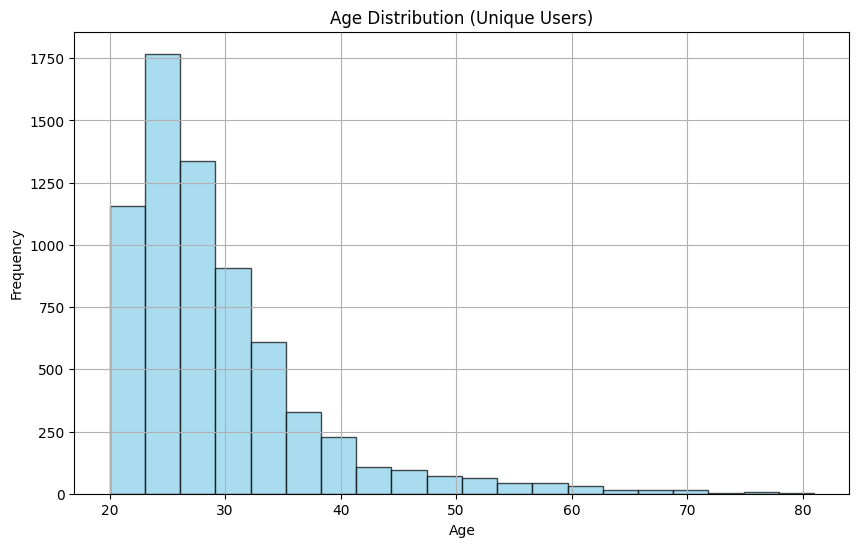

count    6847.000000
mean       29.736527
std         8.031350
min        20.000000
25%        24.000000
50%        28.000000
75%        32.000000
max        81.000000
Name: age, dtype: float64

In [138]:
unique_users_df = df.drop_duplicates(subset='account_id')

# Histogram plot
plt.figure(figsize=(10, 6))
plt.hist(unique_users_df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution (Unique Users)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

unique_users_df['age'].describe()

Total transaction value by age **groups**

In [147]:
age_group_balance = df.groupby('age_group')['txn_abs'].sum().reset_index(name='sum_balance_by_age_group')
df.groupby('age_group')['txn_abs'].sum().reset_index(name='sum_balance_by_age_group')

,age_group,sum_balance_by_age_group
0,0-20,1.256000e+06
1,20-30,2.291484e+11
2,30-40,3.429591e+11
3,40-50,7.030812e+10
4,50-60,2.258285e+10
5,60-70,2.619590e+09
6,70-80,6.240320e+08
7,80-90,8.922400e+07
8,90-100,0.000000e+00


Transaction count

In [145]:
df.groupby('age_group')['txn_amount'].count().reset_index(name='transaction_count')
total_transaction_count = df['txn_amount'].count()
total_df = pd.DataFrame({'age_group': ['Total'], 'transaction_count': [total_transaction_count]})
pd.concat([transaction_count_by_age_group, total_df], ignore_index=True)

,age_group,transaction_count
0,0-20,22
1,20-30,130123
2,30-40,58127
3,40-50,8518
4,50-60,2532
5,60-70,571
6,70-80,91
7,80-90,2
8,90-100,0
9,Total,199986


In [151]:
data_table.enable_dataframe_formatter()

# Calculate the average transaction value of each age group
age_group_balance['average_transaction_value'] = (age_group_balance['sum_balance_by_age_group'] / transaction_count_by_age_group['transaction_count'])

# Convert DataFrame to data table and display
data_table.DataTable(age_group_balance)

,age_group,sum_balance_by_age_group,average_transaction_value
0,0-20,1.256000e+06,5.709091e+04
1,20-30,2.291484e+11,1.761014e+06
2,30-40,3.429591e+11,5.900169e+06
3,40-50,7.030812e+10,8.254065e+06
4,50-60,2.258285e+10,8.918976e+06
5,60-70,2.619590e+09,4.587723e+06
6,70-80,6.240320e+08,6.857495e+06
7,80-90,8.922400e+07,4.461200e+07
8,90-100,0.000000e+00,NaN


Average transaction value

## **Transaction**
Trends in Q1/2021

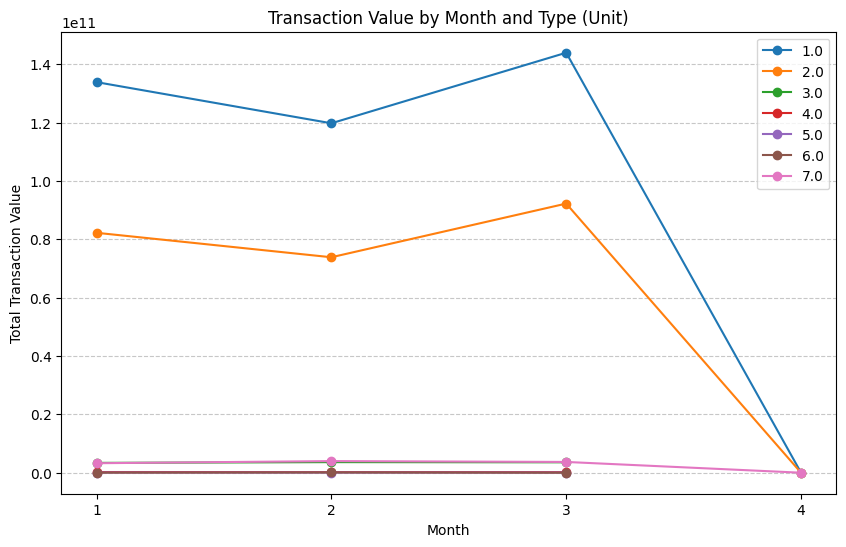

In [175]:
transaction_value_by_month_and_type = df.groupby(['month', 'txn_type_code'])['txn_abs'].sum().reset_index()
pivot_table = transaction_value_by_month_and_type.pivot(index='month', columns='txn_type_code', values='txn_abs')

# Plotting
plt.figure(figsize=(10, 6))
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], marker='o', label=column)

plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.title('Transaction Value by Month and Type (Unit)')
plt.xticks(pivot_table.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Average transaction value by type

In [177]:
avg_transaction_by_type = df.groupby('txn_type_code')['txn_abs'].mean().reset_index()
avg_transaction_by_type.columns = ['Transaction Type', 'Average Transaction Value']
display(data_table.DataTable(avg_transaction_by_type))

,Transaction Type,Average Transaction Value
0,1.0,3.337206e+06
1,2.0,3.921360e+06
2,3.0,2.304939e+06
3,4.0,1.957081e+05
4,5.0,6.518351e+04
5,6.0,3.367284e+04
6,7.0,3.293616e+06


Correlation check between transaction value & daytime/age

In [198]:
correlation = df['age'].corr(df['txn_abs'])
print("Correlation between age and transaction value:", correlation)

Correlation between age and transaction value: 0.1181378839175458


In [197]:
df['txn_ts_time'] = pd.to_numeric(df['txn_ts_time'], errors='coerce')
correlation = df['txn_amount'].corr(df['txn_ts_time'])
print("Correlation between transaction amount and hour of the day:", correlation)

Correlation between transaction amount and hour of the day: nan


Distribution of transaction during a day time & week

In [241]:
#Change data type
df.loc[0, 'txn_ts'] = "2021-01-01 11:52:00"
df['txn_ts'] = pd.to_datetime(df['txn_ts'], format='%Y-%m-%d %H:%M:%S')
df['txn_ts_numeric'] = df['txn_ts'].dt.strftime('%Y%m%d%H%M%S')
df['txn_ts_numeric'] = df['txn_ts'].astype(int)


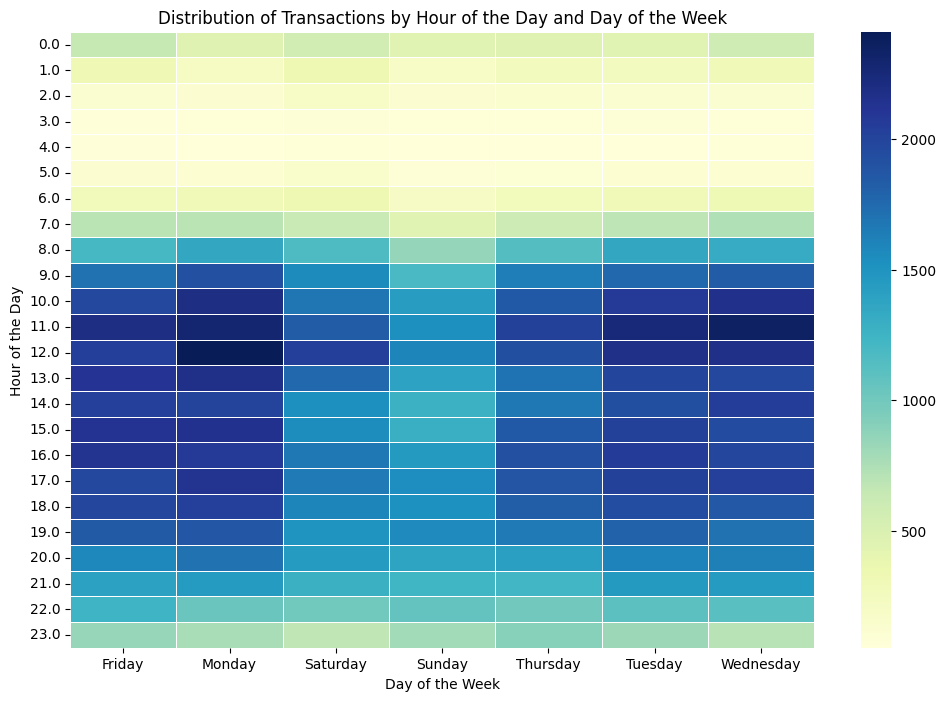

In [251]:
df['hour_of_day'] = df['txn_ts'].dt.hour
df['day_of_week'] = df['txn_ts'].dt.day_name()
transaction_count_by_day_hour = df.pivot_table(index='hour_of_day', columns='day_of_week', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(transaction_count_by_day_hour, cmap='YlGnBu', linewidths=0.5)
plt.title('Distribution of Transactions by Hour of the Day and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.yticks(rotation=0)
plt.show()

**What's next?**

The analysis of the above results is included in the presentation (Link)

In case of any concern, please contact me via my email - cuongnguyen1212122@gmail.com; or personal phone - +84-965-962-762